In [90]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


from simulator import simulator
from ads import ADS

# Driver State plot

In [22]:
sim = simulator(200)
env = sim.simulate_environment()
road = env["road"]
char = env["driver_char"]
driver = env["driver"]


driver_state_evol = pd.read_csv("data/driver_state_evol", delim_whitespace=True)
driver_state_evol.set_index(["Current", "Obstacle"], inplace=True)
driver_char = pd.read_csv("data/driver_char", index_col=0, delim_whitespace=True)

ads = ADS(road, char, driver, driver_char, driver_state_evol)
ads.complete_road()

df_driver_state = pd.DataFrame({"cell": np.arange(0,195), "true_state": driver[0:195], "prob": ads.prob_driver_state_arr[0:195]} )

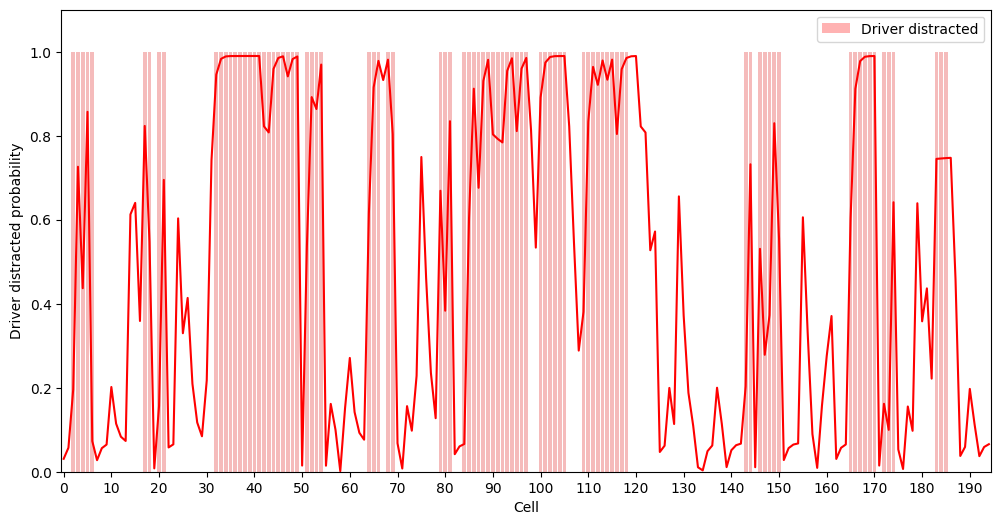

In [116]:
matplotlib.rc_file_defaults()
ax = sns.set_style(style=None, rc=None )

fig, ax = plt.subplots(figsize=(12,6))

plot_ = sns.lineplot(df_driver_state['cell'], df_driver_state['prob'], sort = False, color='r')
sns.barplot(data = df_driver_state, x='cell', y='true_state', color='r', alpha=0.3)

#ax.xaxis.set_major_locator(plt.MaxNLocator(3))

ax.set(xlabel='Cell', ylabel='Driver distracted probability')

new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
plt.ylim(0,1.1)

legend_elements = [Patch(facecolor='r', alpha=0.3,
                         label='Driver distracted')]

ax.legend(handles=legend_elements)
plt.show()

plot_.figure.savefig("figs/driver_state.png")

# Simulation aggregated results

In [106]:
df = pd.read_csv("results/sim1.csv")

In [107]:
df.head()

,prop_manual,n_RtI,n_emergency,prop_rejected_RtI,avg_len_man,state_warnings,rock_warnings,puddle_warnings
0,0.154774,52,9,0.103448,4.843750,317,76,45
1,0.116583,63,17,0.100000,3.411765,367,37,65
2,0.198995,64,10,0.072464,5.210526,317,33,81
3,0.122613,104,35,0.045872,2.772727,330,147,47
4,0.216080,73,15,0.075949,5.119048,274,57,83


In [131]:
def plot_hist(df, x, xlab, path):
    
    matplotlib.rc_file_defaults()
    ax = sns.set_style(style=None, rc=None )
    fig, ax = plt.subplots(figsize=(12,6))
    plot_ = sns.distplot(df[x], bins=20, hist_kws={"rwidth":0.95,'edgecolor':'black', 'alpha':0.3})
    ax.set(xlabel=xlab, ylabel='Count')
    plot_.figure.savefig(path)

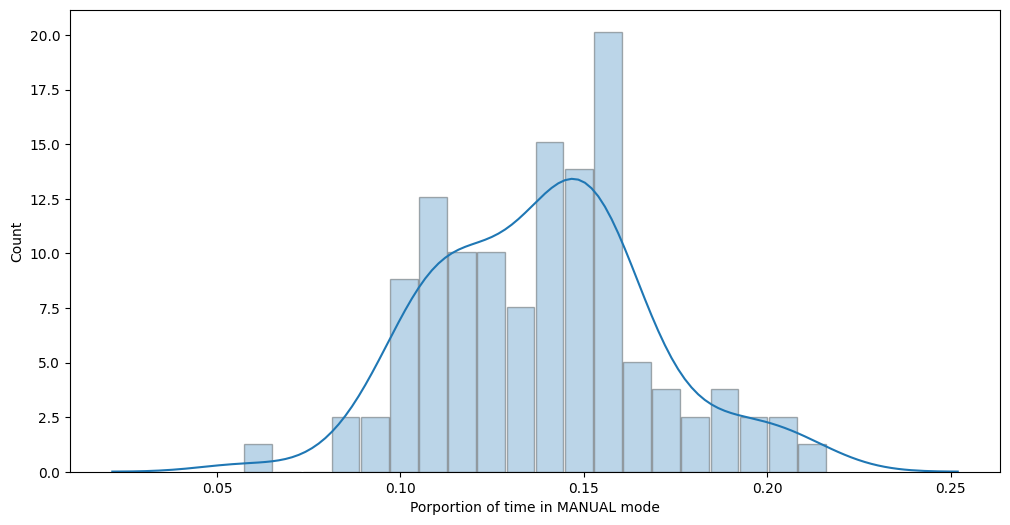

In [132]:
plot_hist(df, 'prop_manual', 'Porportion of time in MANUAL mode', 'figs/prop_time_man.png')

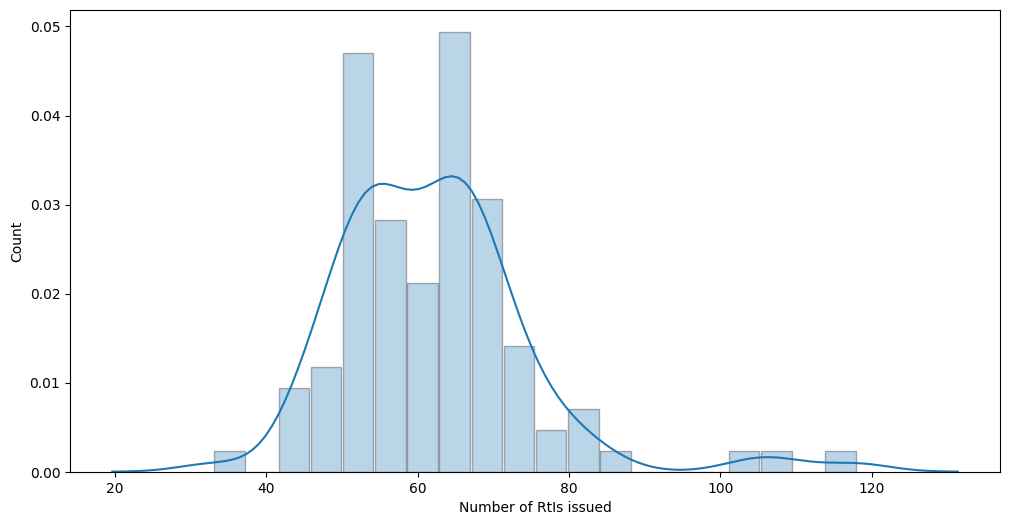

In [133]:
plot_hist(df, 'n_RtI', 'Number of RtIs issued', 'figs/n_RtI.png')

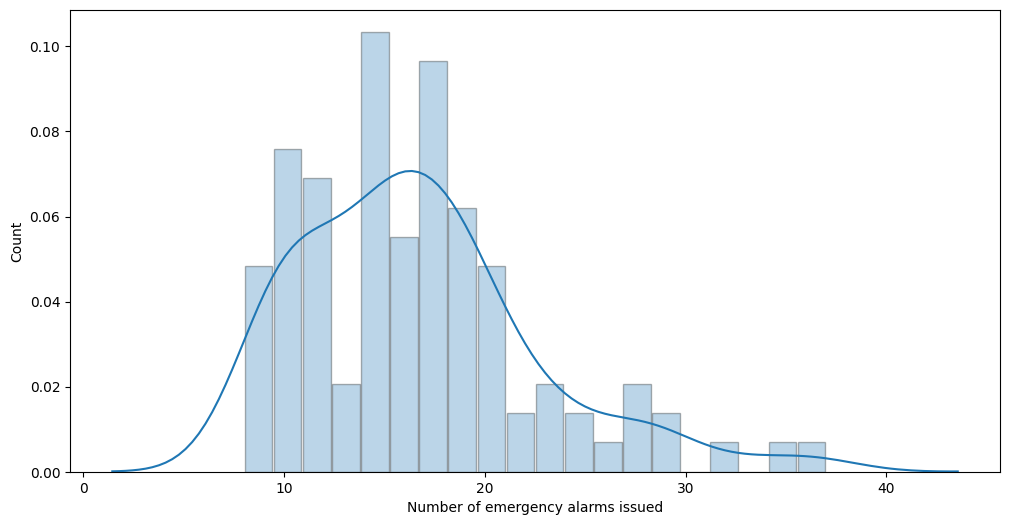

In [134]:
plot_hist(df, 'n_emergency', 'Number of emergency alarms issued', 'figs/n_emergency.png')

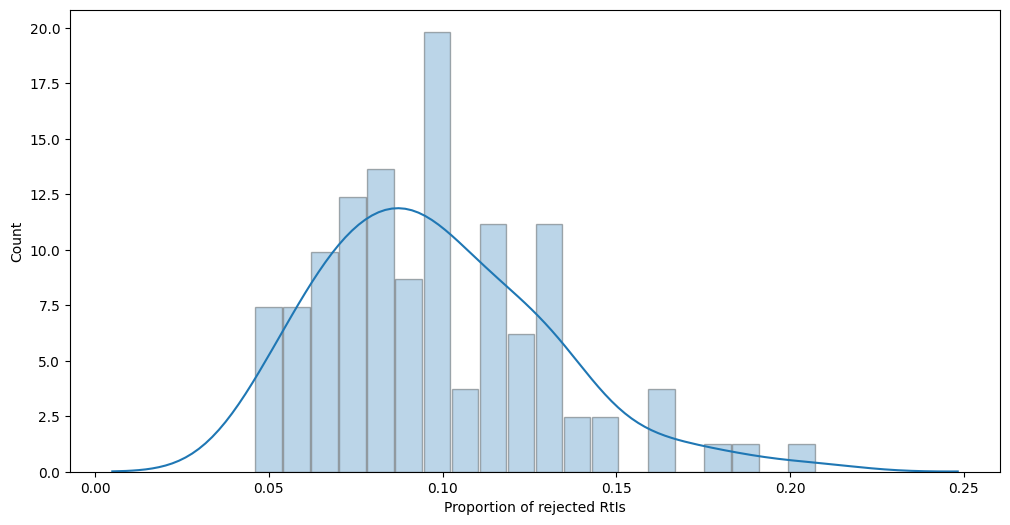

In [135]:
plot_hist(df, 'prop_rejected_RtI', 'Proportion of rejected RtIs', 'figs/prop_rejected_RtI.png')

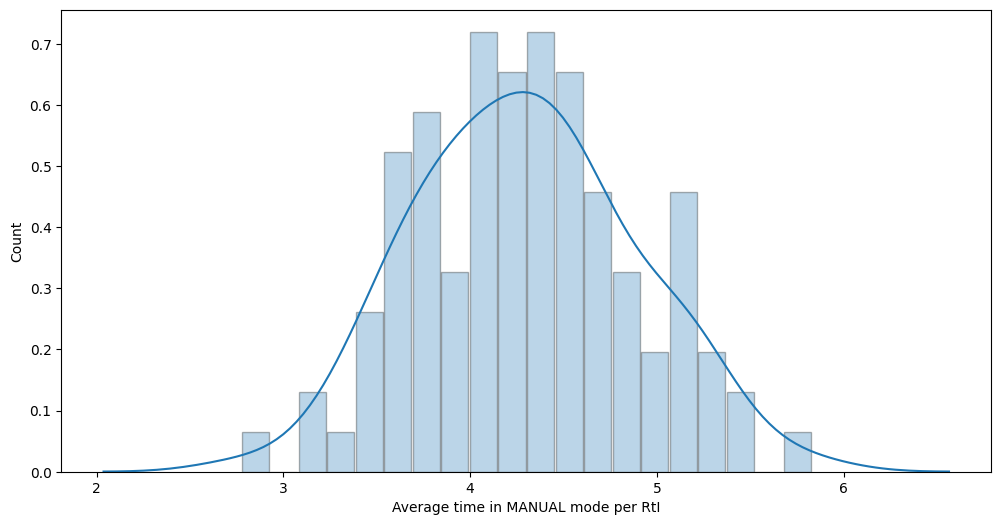

In [136]:
plot_hist(df, 'avg_len_man', 'Average time in MANUAL mode per RtI', 'figs/avg_len_man.png')